In [12]:
#pip install cvxpy[GLPK,SCIP]

# **Aircraft Trajectory Planning With Collision Avoidance Using Mixed Integer Linear Programming**


[Richards, A., & How, J. P. (2002). Aircraft trajectory planning with collision avoidance using mixed integer linear programming. Proceedings of the American Control Conference](https://doi.org/10.1109/ACC.2002.1023918)


- Other references from the same main author:

[Richards, A. G. (2002). Trajectory Optimization using Mixed-Integer Linear Programming. MASSACHUSETTS INSTITUTE OF TECHNOLOGY](https://www.mit.edu/people/jhow/Richards_SM.pdf)

[Richards, A., & How, J. (2005). Mixed-integer programming for control. Proceedings of the American Control Conference, 2676–2683](https://doi.org/10.1109/ACC.2005.1470372)


- Additional refereces of various authors:

[Schouwenaars, T., De Moor, B., Feron, E., & How, J. (2001). Mixed integer programming for multi-vehicle path planning. Proceedings of the European Control Conference](https://doi.org/10.239195/ecc.2001.7076321)

[Schouwenaars, T., How, J., & Feron, E. (2004). Receding horizon path planning with implicit safety guarantees. Proceedings of the European Control Conference](https://doi.org/10.23919/acc.2004.1384742)

[Schouwenaars, T. (2006). Safe Trajectory Planning of Autonomous Vehicles. MASSACHUSETTS INSTITUTE OF TECHNOLOGY](http://hdl.handle.net/1721.1/35298)

[Culligan, K. F. (2006). Online trajectory planning for uavs using mixed integer linear programming. MASSACHUSETTS INSTITUTE OF TECHNOLOGY](http://dspace.mit.edu/handle/1721.1/37952)

[Liying Yang, Juntong Qi, & Jianda Han. (2012). Path planning methods for mobile robots with linear programming. Proceedings of the International Conference on Modelling, Identification and Control](https://ieeexplore.ieee.org/document/6260329)

## **Plotting**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams.update({'font.size': 8})


def plot(T=None, C=None, F=None, S=None, s0=None, sf=None, style='-r'):
    '''
    S : 2-dimensional array (4, n)

    S[0,:] --> x
    S[1,:] --> xdot
    S[2,:] --> y
    S[3,:] --> ydot
    '''
    colors = ['b', 'g', 'r', 'c', 'y', 'm', 'k']

    fig = plt.figure(figsize=(5, 6));
    ax = fig.subplots(3, 1, height_ratios=[3,1,1]);

    if S is not None and T is not None:
        for k in range(len(s0)):
            V = np.sqrt(S[1+4*k,:]**2 + S[3+4*k,:]**2)
            U = np.sqrt(F[0+2*k,:]**2 + F[1+2*k,:]**2)

            ax[0].plot(S[0+4*k,:], S[2+4*k,:], marker='.', color=colors[k]);
            ax[1].plot(T, V, color=colors[k]);
            ax[2].plot(T[0:-1], U, color=colors[k]);

    if s0 is not None:
        for k in range(len(s0)):
            ax[0].plot(s0[k,0], s0[k,2], marker='o', markersize=10, color=colors[k]);

    if sf is not None:
        for k in range(len(sf)):
            ax[0].plot(sf[k,0], sf[k,2], marker='d', markersize=8, color=colors[k]);

    if C is not None:
        RECTS = []
        for k in range(len(C)):
            RECTS.append(patches.Rectangle((C[k,0], C[k,2]),
                                        np.abs(C[k,0]-C[k,1]),
                                        np.abs(C[k,2]-C[k,3]),
                                        linewidth=1, edgecolor='g', facecolor='g')
        )

        for k in range(len(RECTS)):
            ax[0].add_patch(RECTS[k])

    ax[0].set_aspect('equal');
    ax[0].axis('equal');
    ax[0].set_xlabel('$x$');
    ax[0].set_ylabel('$y$');

    ax[1].set_xlabel('$Time (s)$');
    ax[1].set_ylabel('$|v|$');

    ax[2].set_xlabel('$Time (s)$');
    ax[2].set_ylabel('$|f|$');

    plt.tight_layout()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import base64


plt.rcParams["animation.embed_limit"] = 50
plt.rcParams.update({'font.size': 8})

from matplotlib import rc
rc('animation', html='jshtml')

def animate(T=None, C=None, F=None, S=None, s0=None, sf=None, interval=1.0, d=0.5):
    '''
    S : 2-dimensional array (4, n)

    S[0,:] --> x
    S[1,:] --> xdot
    S[2,:] --> y
    S[3,:] --> ydot
    '''

    colors = ['b', 'g', 'r', 'c', 'y', 'm', 'k']
    fig = plt.figure(figsize=(5, 6));
    ax = fig.subplots(3, 1, height_ratios=[3,1,1]);

    h = []
    g = []
    for k in range(len(s0)):
        V = np.sqrt(S[1+4*k,:]**2 + S[3+4*k,:]**2)
        U = np.sqrt(F[0+2*k,:]**2 + F[1+2*k,:]**2)

        ax[0].plot(S[0+4*k,:], S[2+4*k,:], marker='.', color=colors[k]);
        ax[1].plot(T, V, color=colors[k]);
        ax[2].plot(T[0:-1], U, color=colors[k]);

        h.append(ax[0].plot([0., 0.], [0., 0.], marker='d', markersize=8, color=colors[k]));
        g.append(patches.Rectangle((0,0), 2*d, 2*d, edgecolor=colors[k], fill=False))
        ax[0].add_patch(g[k])

    h = np.array(h)
    h = h.reshape(-1)

    def update(i):
        for k in range(len(s0)):
            h[k].set_data([S[0+4*k,i], S[0+4*k,i]], [S[2+4*k,i], S[2+4*k,i]]);
            g[k].set_xy((S[0+4*k,i]-d, S[2+4*k,i]-d))
        return h

    ani = animation.FuncAnimation(fig, update, len(T), interval=interval*1000, blit=True);

    if s0 is not None:
        for k in range(len(s0)):
            ax[0].plot(s0[k,0], s0[k,2], marker='o', markersize=10, color=colors[k]);

    if sf is not None:
        for k in range(len(sf)):
            ax[0].plot(sf[k,0], sf[k,2], marker='d', markersize=8, color=colors[k]);

    if C is not None:
        RECTS = []
        for k in range(len(C)):
            RECTS.append(patches.Rectangle((C[k,0], C[k,2]),
                                        np.abs(C[k,0]-C[k,1]),
                                        np.abs(C[k,2]-C[k,3]),
                                        linewidth=1, edgecolor='g', facecolor='g')
        )

        for k in range(len(RECTS)):
            ax[0].add_patch(RECTS[k]);

    ax[0].set_aspect('equal');
    ax[0].axis('equal');
    ax[0].set_xlabel('$x$');
    ax[0].set_ylabel('$y$');

    ax[1].set_xlabel('$Time (s)$');
    ax[1].set_ylabel('$|v|$');

    ax[2].set_xlabel('$Time (s)$');
    ax[2].set_ylabel('$|f|$');

    plt.tight_layout();

    return ani;


def display_gif(fn):
    b64 = base64.b64encode(open(fn,'rb').read()).decode('ascii')
    display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))
    
    

## **Test environments**

In [15]:
import numpy as np

%matplotlib inline


'''
Given an following array: (xmin, xmax, ymin, ymax)
This corresponds to a rectangle  with:
  lower-left corner located at (xmin, ymin)
  width = abs(xmax - xmin)
  height = abs(ymax - ymin)
'''

def create_env1():
    # Figure 4
    C = np.array([[-4,-3, 3.5, 6],
                  [ 2, 3,   3, 9],
                  [ 0, 1,   1, 5]], dtype=np.float32)
    return C

def create_env2():
    # Figure 9
    C = np.array([[1, 3, 0, 8]], dtype=np.float32)
    return C

## **System model**

The vehicle is modeled as a simple 2-D discrete double integrator.


$$
\begin{bmatrix}
x_{i+1}\\
v_{x_{i+1}}\\
y_{i+1}\\
v_{y}{}_{_{i+1}}
\end{bmatrix} =\begin{bmatrix}
1 & \Delta t & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & \Delta t\\
0 & 0 & 0 & 1
\end{bmatrix}\begin{bmatrix}
x_{i}\\
v_{x_{i}}\\
y_{i}\\
v_{y_{i}}
\end{bmatrix} +\frac{1}{m}\begin{bmatrix}
0.5\Delta t^{2} & 0\\
\Delta t & 0\\
0 & 0.5\Delta t^{2}\\
0 & \Delta t
\end{bmatrix}\begin{bmatrix}
f_{x}\\
f_{y}
\end{bmatrix}
$$

In [16]:
import numpy as np

def generate_model(dt, mass):
    A = np.array([[1.,   dt,  0., 0. ], # x
                [0.,   1,   0., 0. ],    # xdot
                [0.,   0.,  1., dt ],    # y
                [0.,   0.,  0., 1, ]])   # ydot
    B = 1.0 / mass * np.array([[0.5*dt**2, 0.        ],
                                [dt,        0.        ],
                                [0.,        0.5*dt**2 ],
                                [0.,        dt        ]])
    return A, B

The parameters are mentioned in Section 4 of the paper.

$$
\begin{equation}
\begin{aligned}
m &= 5 \, \text{kg}\\
\Delta t &=  2 \, \text{s}\\
T &= 60 \text{s}\\
v_{\text{max}} &= 0.225 \, \text{m/s}\\
\epsilon &= 0.001
\end{aligned}
\end{equation}
$$

## **Planning**

Implemented constraints:
- Collision avoidance (Eq. (8))
    - Vehicle to vehicle
    - Vehicle to rectangular obstacle
- Minimum time trajectory (Eq. (9) to Eq. (12))


*"Multiple waypoints" is not yet implemented!*


In [24]:
from cvxpy import *


def plan(N, s0, sf, C=None, wmax=np.deg2rad(15.0), mass=5.0, vmax=0.225, dt=2.0, d=1.0, solver="MOSEK"):
    '''
    d  is the safety distance of one vehcile to another vehicle
    vmax it the magnitude of the allowable maximum speed
    wmax is the maximum turn rate
    '''

    Ap, Bp = generate_model(dt, mass)
    [ns, nf] = Bp.shape

    s0 = np.reshape(s0, (-1, 4))
    P = len(s0)

    # Define problem
    f = Variable((nf*P, N)) # input variables
    s = Variable((ns*P, N+1)) # state variables, make S[N] as the terminal state

    # R is a positive number that is much larger than any position or velocity
    # to be encountered in the problem
    R = 20.0

    # Constraints for the intial states, eq. (4)
    constraints =  [s[0:4,0] == s0[0]]
    for p in range(1,P):
        constraints  += [s[0+ns*p:ns+ns*p,0] == s0[p]]

    # System dynamics constraints. eq. (3)
    for p in range(P):
        for k in range(N):
            constraints += [s[0+ns*p:ns+ns*p,k+1] == Ap@s[0+ns*p:ns+ns*p,k] + Bp@f[0+nf*p:nf+nf*p,k]]

    # Velocity-force dynamic constraints, polytopic circle
    M = 32 # number of the polygon sides
    vmax = vmax * np.cos(np.pi/M) # correction factor as explained in Culligan thesis, p.31, eq. (2.12)
    fmax = wmax * mass * vmax  # See eq. (2)
    
    for p in range(P):
        for k in range(N):
            for m in range(1,M+1):
                constraints += [(f[0+nf*p,k]*np.sin(2*np.pi*m/M) + f[1+nf*p,k]*np.cos(2*np.pi*m/M)) <= fmax]  # eq. (6)

    for p in range(P):
        for k in range(1,N+1):
            for m in range(1,M+1):
                constraints += [(s[1+ns*p,k]*np.sin(2*np.pi*m/M) + s[3+ns*p,k]*np.cos(2*np.pi*m/M)) <= vmax]  # eq. (7)

    # Collision avoidance
    # Every other vehicle is an obstacle to every other vehicle
    p1 = Variable((P*P, N+1), boolean=True)
    p2 = Variable((P*P, N+1), boolean=True)
    p3 = Variable((P*P, N+1), boolean=True)
    p4 = Variable((P*P, N+1), boolean=True)

    for p in range(P-1):
        for k in range(1,N+1): # from 1 to N, exclude initials
            for q in range(p+1, P):
                constraints += [s[0+ns*p,k]  <=  (s[0+ns*q,k] - d) + R*p1[q+p*P,k],
                                -s[0+ns*p,k] <= -(s[0+ns*q,k] + d) + R*p2[q+p*P,k],
                                s[2+ns*p,k]  <=  (s[2+ns*q,k] - d) + R*p3[q+p*P,k],
                                -s[2+ns*p,k] <= -(s[2+ns*q,k] + d) + R*p4[q+p*P,k]]
                constraints += [p1[q+p*P,k] + p2[q+p*P,k] + p3[q+p*P,k] + p4[q+p*P,k] <= 3]

    # Rectangular obstacles
    if C is not None:
        C = np.reshape(C, (-1,4))
        L = len(C) # Number of the rectangular obstacles
        t1 = Variable((L*P, N+1), boolean=True)
        t2 = Variable((L*P, N+1), boolean=True)
        t3 = Variable((L*P, N+1), boolean=True)
        t4 = Variable((L*P, N+1), boolean=True)

        for p in range(P):
            for k in range(1,N+1): # from 1 to N, exclude initials
                for l in range(L):  # eq. (8)
                    constraints += [s[0+ns*p,k]  <=  C[l, 0] + R*t1[l+p*L,k],
                                    -s[0+ns*p,k] <= -C[l, 1] + R*t2[l+p*L,k],
                                    s[2+ns*p,k]  <=  C[l, 2] + R*t3[l+p*L,k],
                                    -s[2+ns*p,k] <= -C[l, 3] + R*t4[l+p*L,k]]
                    constraints += [t1[l+p*L,k] + t2[l+p*L,k] + t3[l+p*L,k] + t4[l+p*L,k] <= 3]

    # Minimum time constraints
    c  = Variable((P, N+1), boolean=True)

    for p in range(P):
        for k in range(1,N+1):
            # for positions
            constraints += [(s[0+ns*p,k]-sf[p][0]) <=  R*(1-c[p,k]),
                        (s[0+ns*p,k]-sf[p][0]) >= -R*(1-c[p,k]),
                        (s[2+ns*p,k]-sf[p][2]) <=  R*(1-c[p,k]),
                        (s[2+ns*p,k]-sf[p][2]) >= -R*(1-c[p,k])]


            # for velocities
            constraints += [(s[1+ns*p,k]-sf[p][1]) <=  R*(1-c[p,k]),
                        (s[1+ns*p,k]-sf[p][1]) >= -R*(1-c[p,k]),
                        (s[3+ns*p,k]-sf[p][3]) <=  R*(1-c[p,k]),
                        (s[3+ns*p,k]-sf[p][3]) >= -R*(1-c[p,k])]

        constraints += [1 == sum(c[p, 1:])]  # eq. (14)

    # eq. (9) to eq. (12)
    J = 0.
    for p in range(P):
        for k in range(1,N+1):
            J += k*dt*c[p,k]

    epsilon = 0.1
    for p in range(P):
        for k in range(N):
            J += epsilon*norm1(f[0+nf*p:2+nf*p,k])

    prob = Problem(Minimize(J), constraints)

    res = prob.solve(solver=solver, verbose=False)
    print("J=", J.value)

    return s.value, f.value, J.value

## **Experiments**

### Experiment 1

In [25]:
s0 =  np.array([[1, 0, -1.75, 0],
                [1, 0,  1.75, 0],
                [-2,0,  0,    0]], dtype=np.float32)
sf =  np.array([[-1, 0,  1.75, 0],
                [-1, 0, -1.75, 0],
                [ 2, 0,  0,    0]], dtype=np.float32)


# Prediction horizon
tf = 30.0
dt = 2.0
N = np.int32(tf/dt)

s, f, j = plan(N=N, s0=s0, sf=sf, wmax=np.deg2rad(15.0), mass=5.0, dt=dt, d=0.5, solver="SCIP")

J= 68.45625818924616


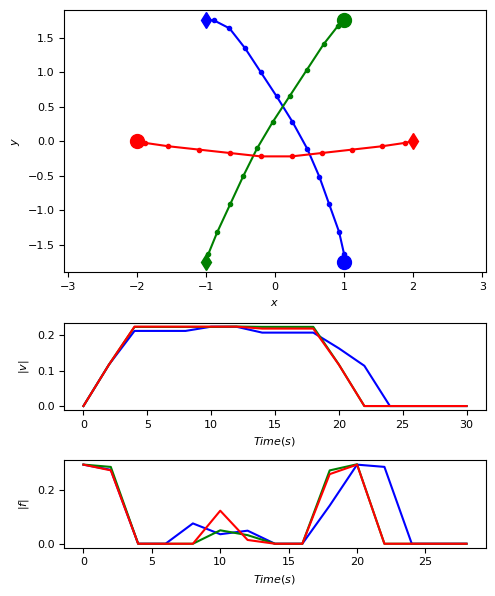

In [20]:
%matplotlib inline

time_span = np.linspace(0, tf, N+1)
plot(T=time_span, F=f, S=s, s0=s0, sf=sf)

In [21]:
%matplotlib notebook

time_span = np.linspace(0, tf, N+1)
ani = animate(T=time_span, F=f, S=s, s0=s0, sf=sf)
ani


<IPython.core.display.Javascript object>

In [22]:
ani.save("./fig7.gif",fps=1)

![](./fig7.gif)